### Import Required Libraries and Set Up Environment Variables

In [1]:
# Dependencies
import requests
import time
from dotenv import load_dotenv
import os
import pandas as pd
import json
import ast
import os
import urllib.request
from datetime import datetime, timedelta 

# Load the NASA_API_KEY from the env file
load_dotenv()
NASA_API_KEY = os.getenv('NASA_API_KEY')
if not NASA_API_KEY:
    raise ValueError("NASA_API_KEY not found in environment variables")


### CME Data

In [2]:
# Set the base URL to NASA's DONKI API:
base_url = "https://api.nasa.gov/DONKI/"

# Set the specifier for CMEs:
CME = "CME"

# Search for CMEs published between a begin and end date
startDate = "2013-05-01"
endDate   = "2024-05-09"
# NOTE >> Start & End Date paramaters set in Chunking definition below 

# Build URL for CME
# NASA Example:<BaseURL>/CMEAnalysis?startDate=2016-09-01&endDate=2016-09-30&mostAccurateOnly=true&speed=500&halfAngle=30&catalog=ALL&api_key=DEMO_KEY
cme_url = f"{base_url}{CME}?startDate={startDate}&endDate={endDate}&api_key={NASA_API_KEY}"



In [3]:
# Make a "GET" request for the CME URL and store it in a variable named cme_response
GST = 'GST'
gst_url = f"{base_url}GST?startDate={startDate}&endDate={endDate}&api_key={NASA_API_KEY}"


# RS - Get CME data in chunks ( deal with/avoid timeout issues )
def get_cme_data_in_chunks(base_url, CME, NASA_API_KEY, start_date, end_date, chunk_days=180):

    cme_response = []
    current_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_datetime = datetime.strptime(end_date, "%Y-%m-%d")
    
    while current_date < end_datetime:
        chunk_end = min(current_date + timedelta(days=chunk_days), end_datetime)
        
        # New URL for this chunk
        chunk_url = f"{base_url}{CME}?startDate={current_date.strftime('%Y-%m-%d')}&endDate={chunk_end.strftime('%Y-%m-%d')}&api_key={NASA_API_KEY}"
        
        print(f"Requesting data from {current_date.strftime('%Y-%m-%d')} to {chunk_end.strftime('%Y-%m-%d')}")
        try:
            # Request chunk
            response = requests.get(chunk_url)
            if response.status_code == 200:
                chunk_data = response.json()
                cme_response.extend(chunk_data)
                print(f"Successfully retrieved {len(chunk_data)} records")
            else:
                print(f"Failed to get data for chunk: {response.status_code}")
            # Added a needed pause / Sleep timer between requests
            time.sleep(1)            
        except Exception as e:
            print(f"Error retrieving chunk: {e}")
        # Move on to next chunk to the end
        current_date = chunk_end
    return cme_response

# Get the data 
cme_data = get_cme_data_in_chunks(
    base_url=base_url,
    CME=CME,
    NASA_API_KEY=NASA_API_KEY,
    start_date="2013-05-01",
    end_date="2024-05-01",
    # For Testing: end_date="2014-05-01",
    chunk_days=180
)

# Once completed, display # of records retrieved
print(f"Total CME records retrieved from NASA API: {len(cme_data)}")


Requesting data from 2013-05-01 to 2013-10-28
Successfully retrieved 191 records
Requesting data from 2013-10-28 to 2014-04-26
Successfully retrieved 377 records
Requesting data from 2014-04-26 to 2014-10-23
Successfully retrieved 320 records
Requesting data from 2014-10-23 to 2015-04-21
Successfully retrieved 276 records
Requesting data from 2015-04-21 to 2015-10-18
Successfully retrieved 267 records
Requesting data from 2015-10-18 to 2016-04-15
Successfully retrieved 198 records
Requesting data from 2016-04-15 to 2016-10-12
Successfully retrieved 161 records
Requesting data from 2016-10-12 to 2017-04-10
Successfully retrieved 132 records
Requesting data from 2017-04-10 to 2017-10-07
Successfully retrieved 116 records
Requesting data from 2017-10-07 to 2018-04-05
Successfully retrieved 61 records
Requesting data from 2018-04-05 to 2018-10-02
Successfully retrieved 24 records
Requesting data from 2018-10-02 to 2019-03-31
Successfully retrieved 22 records
Requesting data from 2019-03-31

In [4]:
# Convert the response variable to json and store it as a variable named cme_json
# BASIC - > No way with Large Dataset:  cme_json = requests.get(cme_url).json()


# Quick inspection - looking for a valid response:
print(len(cme_data))
# cme_json_content = cme_json.content
# print(cme_json)    # Verify return of a 200 Response code (sucess)



5555


In [5]:
# Preview the first result in JSON format
# Use json.dumps with argument indent=4 to format data
print(json.dumps(cme_data[:1], indent=4))
# print(json.dumps(cme_data[5554], indent=4))

[
    {
        "activityID": "2013-05-01T03:12:00-CME-001",
        "catalog": "M2M_CATALOG",
        "startTime": "2013-05-01T03:12Z",
        "instruments": [
            {
                "displayName": "SOHO: LASCO/C2"
            },
            {
                "displayName": "SOHO: LASCO/C3"
            },
            {
                "displayName": "STEREO A: SECCHI/COR2"
            },
            {
                "displayName": "STEREO B: SECCHI/COR2"
            }
        ],
        "sourceLocation": "",
        "activeRegionNum": null,
        "note": "",
        "submissionTime": "2013-08-07T16:54Z",
        "versionId": 1,
        "link": "https://webtools.ccmc.gsfc.nasa.gov/DONKI/view/CME/2349/-1",
        "cmeAnalyses": [
            {
                "isMostAccurate": true,
                "time21_5": "2013-05-01T07:07Z",
                "latitude": 12.0,
                "longitude": -120.0,
                "halfAngle": 36.0,
                "speed": 860.0,
        

In [6]:
# Convert cme_json to a Pandas DataFrame 
# Keep only the columns: activityID, startTime, linkedEvents
print(len(cme_data))
cme_df = pd.DataFrame(cme_data)[['activityID', 'startTime', 'linkedEvents']]
# print(f"Initial cme_df: {cme_df}")
# print("Columns:", cme_df.columns)
# print("Shape:", cme_df.shape)
# cme_df.shape
cme_df.head()

5555


,activityID,startTime,linkedEvents
0,2013-05-01T03:12:00-CME-001,2013-05-01T03:12Z,[{'activityID': '2013-05-04T04:52:00-IPS-001'}]
1,2013-05-02T05:24:00-CME-001,2013-05-02T05:24Z,None
2,2013-05-02T14:36:00-CME-001,2013-05-02T14:36Z,None
3,2013-05-03T18:00:00-CME-001,2013-05-03T18:00Z,None
4,2013-05-03T22:36:00-CME-001,2013-05-03T22:36Z,[{'activityID': '2013-05-07T04:37:00-IPS-001'}]


In [7]:
# Notice that the linkedEvents column allows us to identify the corresponding GST
# Remove rows with missing 'linkedEvents' since we won't be able to assign these to GSTs
# First double check Data we have:
# print("Initial cme_df columns:", cme_df.columns)
# print("Initial cme_df shape:", cme_df.shape)

cme_df = cme_df[cme_df['linkedEvents'].notnull()].reset_index(drop=True)

# cme_df = cme_df['linkedEvents'].notnull().reset_index(drop=True)
# cme_df.to_csv('cme_df_check_data.csv', index=False)
# print(cme_df.shape)
# cme_df.tail(10)
cme_df.head()



,activityID,startTime,linkedEvents
0,2013-05-01T03:12:00-CME-001,2013-05-01T03:12Z,[{'activityID': '2013-05-04T04:52:00-IPS-001'}]
1,2013-05-03T22:36:00-CME-001,2013-05-03T22:36Z,[{'activityID': '2013-05-07T04:37:00-IPS-001'}]
2,2013-05-09T19:29:00-CME-001,2013-05-09T19:29Z,[{'activityID': '2013-05-12T23:30:00-IPS-001'}]
3,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,[{'activityID': '2013-05-13T01:53:00-FLR-001'}...
4,2013-05-13T16:18:00-CME-001,2013-05-13T16:18Z,[{'activityID': '2013-05-13T15:40:00-FLR-001'}...


In [8]:
# Notice that the linkedEvents sometimes contains multiple events per row
# Write a nested for loop that iterates first over each row in the cme DataFrame (using the index)
# and then iterates over the values in 'linkedEvents' 
# and adds the elements individually to a list of dictionaries where each row is one element 

# Initialize an empty list to store the expanded rows
expanded_rows = []

# Iterate over each index in the DataFrame
 # Iterate over each dictionary in the list
      # Append a new dictionary to the expanded_rows list for each dictionary item and corresponding 'activityID' and 'startTime' value
    
for idx in cme_df.index:
    for event in cme_df.loc[idx, 'linkedEvents']:
        expanded_rows.append({
            'activityID': cme_df.loc[idx, 'activityID'],
            'startTime': cme_df.loc[idx, 'startTime'],
            'linkedEvents': event
        })
  
# Create a new DataFrame from the expanded rows
expanded_cme_linkedevents = pd.DataFrame(expanded_rows)
expanded_cme_linkedevents.head()
# print(expanded_cme_linkedevents.shape)


,activityID,startTime,linkedEvents
0,2013-05-01T03:12:00-CME-001,2013-05-01T03:12Z,{'activityID': '2013-05-04T04:52:00-IPS-001'}
1,2013-05-03T22:36:00-CME-001,2013-05-03T22:36Z,{'activityID': '2013-05-07T04:37:00-IPS-001'}
2,2013-05-09T19:29:00-CME-001,2013-05-09T19:29Z,{'activityID': '2013-05-12T23:30:00-IPS-001'}
3,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,{'activityID': '2013-05-13T01:53:00-FLR-001'}
4,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,{'activityID': '2013-05-13T04:12:00-SEP-001'}


In [9]:
# Create a function called extract_activityID_from_dict that takes a dict as input such as in linkedEvents
# and verify below that it works as expected using one row from linkedEvents as an example
# Be sure to use a try and excep# Original 
        # Log the error or print it for debugging

def extract_activityID_from_dict(event_dict):
    try:
        # If it is a list
        if isinstance(event_dict, list):
            if len(event_dict) > 0:
                # if exists, take item
                event_dict = event_dict[0]
            else:
                print("Empty List !")
                return None
                
        # Extract activityID from dictionary
        result = event_dict['activityID']
        # print(f"Successfully processed - Reference activityID: {result}")
        return result
            
    except (KeyError, TypeError, IndexError) as e:
        print(f"Error extracting activityID: {e}")
        print(f"Problem input: {event_dict}")
        return None

# Create Code - Then Look at a Example  ({'activityID': '2013-05-04T04:52:00-IPS-001'})
extract_activityID_from_dict({'activityID': '2013-05-04T04:52:00-IPS-001'})


'2013-05-04T04:52:00-IPS-001'

In [10]:
# Apply this function to each row in the 'linkedEvents' column (you can use apply() and a lambda function)
# and create a new column called 'GST_ActivityID' using loc indexer:

expanded_cme_linkedevents['GST_ActivityID'] = expanded_cme_linkedevents['linkedEvents'].apply(lambda d: extract_activityID_from_dict(d))
# print(expanded_cme_linkedevents.info())
# print(expanded_cme_linkedevents.shape)
# print(expanded_cme_linkedevents.dtypes)
# print(expanded_cme_linkedevents.head())
# print(expanded_cme_linkedevents.columns)
expanded_cme_linkedevents

,activityID,startTime,linkedEvents,GST_ActivityID
0,2013-05-01T03:12:00-CME-001,2013-05-01T03:12Z,{'activityID': '2013-05-04T04:52:00-IPS-001'},2013-05-04T04:52:00-IPS-001
1,2013-05-03T22:36:00-CME-001,2013-05-03T22:36Z,{'activityID': '2013-05-07T04:37:00-IPS-001'},2013-05-07T04:37:00-IPS-001
2,2013-05-09T19:29:00-CME-001,2013-05-09T19:29Z,{'activityID': '2013-05-12T23:30:00-IPS-001'},2013-05-12T23:30:00-IPS-001
3,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,{'activityID': '2013-05-13T01:53:00-FLR-001'},2013-05-13T01:53:00-FLR-001
4,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,{'activityID': '2013-05-13T04:12:00-SEP-001'},2013-05-13T04:12:00-SEP-001
...,...,...,...,...
1727,2024-04-24T15:05:00-CME-001,2024-04-24T15:05Z,{'activityID': '2024-04-24T14:02:00-FLR-001'},2024-04-24T14:02:00-FLR-001
1728,2024-04-25T18:24:00-CME-001,2024-04-25T18:24Z,{'activityID': '2024-04-25T17:03:00-FLR-001'},2024-04-25T17:03:00-FLR-001
1729,2024-04-30T00:36:00-CME-001,2024-04-30T00:36Z,{'activityID': '2024-04-30T00:46:00-FLR-001'},2024-04-30T00:46:00-FLR-001
1730,2024-05-01T06:36:00-CME-001,2024-05-01T06:36Z,{'activityID': '2024-05-01T05:53:00-FLR-001'},2024-05-01T05:53:00-FLR-001


In [11]:
# Remove rows with missing GST_ActivityID, since we can't assign them to GSTs:
expanded_cme_linkedevents['GST_ActivityID'] = expanded_cme_linkedevents['linkedEvents'].apply(lambda d: extract_activityID_from_dict(d))

expanded_cme_linkedevents['GST_ActivityID'] = expanded_cme_linkedevents['GST_ActivityID'].astype('string')
# expanded_cme_linkedevents = expanded_cme_linkedevents.dropna(subset=['GST_ActivityID']).reset_index(drop=True)

expanded_cme_linkedevents.head()

,activityID,startTime,linkedEvents,GST_ActivityID
0,2013-05-01T03:12:00-CME-001,2013-05-01T03:12Z,{'activityID': '2013-05-04T04:52:00-IPS-001'},2013-05-04T04:52:00-IPS-001
1,2013-05-03T22:36:00-CME-001,2013-05-03T22:36Z,{'activityID': '2013-05-07T04:37:00-IPS-001'},2013-05-07T04:37:00-IPS-001
2,2013-05-09T19:29:00-CME-001,2013-05-09T19:29Z,{'activityID': '2013-05-12T23:30:00-IPS-001'},2013-05-12T23:30:00-IPS-001
3,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,{'activityID': '2013-05-13T01:53:00-FLR-001'},2013-05-13T01:53:00-FLR-001
4,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,{'activityID': '2013-05-13T04:12:00-SEP-001'},2013-05-13T04:12:00-SEP-001


In [12]:
# print out the datatype of each column in this DataFrame:
expanded_cme_linkedevents.info()

# print("Original cme_df shape:", cme_df.shape)
# print("Expanded rows length:", len(expanded_rows))
# print(expanded_cme_linkedevents.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732 entries, 0 to 1731
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   activityID      1732 non-null   object
 1   startTime       1732 non-null   object
 2   linkedEvents    1732 non-null   object
 3   GST_ActivityID  1732 non-null   string
dtypes: object(3), string(1)
memory usage: 54.3+ KB


In [13]:
# Convert the 'GST_ActivityID' column to string format 
expanded_cme_linkedevents['GST_ActivityID'] = expanded_cme_linkedevents['GST_ActivityID'].astype('string')
# print(expanded_cme_linkedevents['GST_ActivityID'].dtype)

# RS: Reordering steps to Rename and THEN set the startTime to DT format:
# Rename startTime to startTime_CME and activityID to cmeID
expanded_cme_linkedevents = expanded_cme_linkedevents.rename(
    columns={'startTime': 'startTime_CME', 
             'activityID': 'cmeID'}
)

# Convert startTime to datetime format  
expanded_cme_linkedevents['startTime_CME'] = pd.to_datetime(expanded_cme_linkedevents['startTime_CME'], utc=True)
# print(expanded_cme_linkedevents['startTime_CME'].dtype)

# Drop linkedEvents
expanded_cme_linkedevents = expanded_cme_linkedevents.drop('linkedEvents', axis=1)
# print(expanded_cme_linkedevents.columns)

# Verify that all steps were executed correctly
expanded_cme_linkedevents.dtypes
expanded_cme_linkedevents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732 entries, 0 to 1731
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   cmeID           1732 non-null   object             
 1   startTime_CME   1732 non-null   datetime64[ns, UTC]
 2   GST_ActivityID  1732 non-null   string             
dtypes: datetime64[ns, UTC](1), object(1), string(1)
memory usage: 40.7+ KB


In [14]:
# We are only interested in CMEs related to GSTs so keep only rows where the GST_ActivityID column contains 'GST'
# use the method 'contains()' from the str library.  
expanded_cme_linkedevents = expanded_cme_linkedevents[expanded_cme_linkedevents['GST_ActivityID'].str.contains('GST')].reset_index(drop=True)
# print(f"Number of rows after filtering: {len(expanded_cme_linkedevents)}")
expanded_cme_linkedevents.tail(5)

# id_types = expanded_cme_linkedevents['GST_ActivityID'].str.split('-').str[-1].value_counts()
# print(id_types)
# print(id_types.head)

,cmeID,startTime_CME,GST_ActivityID
56,2023-12-14T17:38:00-CME-001,2023-12-14 17:38:00+00:00,2023-12-18T06:00:00-GST-001
57,2024-02-28T17:48:00-CME-001,2024-02-28 17:48:00+00:00,2024-03-03T18:00:00-GST-001
58,2024-03-23T01:25:00-CME-001,2024-03-23 01:25:00+00:00,2024-03-24T12:00:00-GST-001
59,2024-03-23T01:48:00-CME-001,2024-03-23 01:48:00+00:00,2024-03-24T12:00:00-GST-001
60,2024-04-15T06:48:00-CME-001,2024-04-15 06:48:00+00:00,2024-04-19T18:00:00-GST-001


In [15]:
# gst_filtered = expanded_cme_linkedevents[
#     expanded_cme_linkedevents['GST_ActivityID'].str.contains('GST', na=False)
# ].reset_index(drop=True)
# print(gst_filtered.shape)

### GST Data

In [16]:
# Set the base URL to NASA's DONKI API:
base_url = "https://api.nasa.gov/DONKI/"

from datetime import datetime
load_dotenv()

# Set the specifier for Geomagnetic Storms (GST):
GST = "GST"

# Search for GSTs between a begin and end date
# startDate = "2013-05-01"
# endDate   = "2014-05-01"
startDate = datetime.strptime("2013-05-01", "%Y-%m-%d").strftime("%Y-%m-%d")
endDate = datetime.strptime("2024-05-01", "%Y-%m-%d").strftime("%Y-%m-%d")

# Build URL for GST
gst_url = f"{base_url}{GST}?startDate={startDate}&endDate={endDate}&api_key={NASA_API_KEY}"
# Test URL concattonation w/o API Key in string:   (CUT:  &api_key={NASA_API_KEY}" )



In [17]:
# Make a "GET" request for the GST URL and store it in a variable named gst_response
gst_response = requests.get(gst_url)

# Get GST data in chunks ( deal with/avoid timeout issues )
def get_gst_data_in_chunks(base_url, GST, NASA_API_KEY, start_date, end_date, chunk_days=180):

    gst_response = []
    current_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_datetime = datetime.strptime(end_date, "%Y-%m-%d")
    
    while current_date < end_datetime:
        chunk_end = min(current_date + timedelta(days=chunk_days), end_datetime)
        
        # New URL for this chunk
        chunk_url = f"{base_url}{GST}?startDate={current_date.strftime('%Y-%m-%d')}&endDate={chunk_end.strftime('%Y-%m-%d')}&api_key={NASA_API_KEY}"
        
        print(f"Requesting data from {current_date.strftime('%Y-%m-%d')} to {chunk_end.strftime('%Y-%m-%d')}")
        try:
            # Request chunk
            response = requests.get(chunk_url)
            if response.status_code == 200:
                chunk_data = response.json()
                gst_response.extend(chunk_data)
                print(f"Successfully retrieved {len(chunk_data)} records")
            else:
                print(f"Failed to get data for chunk: {response.status_code}")
            # Need a pause / Sleep timer between requests
            time.sleep(1)            
        except Exception as e:
            print(f"Error retrieving chunk: {e}")
        # Move on to next chunk to the end
        current_date = chunk_end
    return gst_response

# Get the data directly in chunks
gst_data = get_gst_data_in_chunks(
    base_url=base_url,
    GST=GST,
    NASA_API_KEY=NASA_API_KEY,
    start_date="2013-05-01",
    # end_date="2014-05-01",
    end_date="2024-05-01",
    chunk_days=180
)


# Output # of records retrieved
print(f"Total GST records retrieved from NASA API: {len(gst_data)}")


Requesting data from 2013-05-01 to 2013-10-28
Successfully retrieved 4 records
Requesting data from 2013-10-28 to 2014-04-26
Successfully retrieved 4 records
Requesting data from 2014-04-26 to 2014-10-23
Successfully retrieved 3 records
Requesting data from 2014-10-23 to 2015-04-21
Successfully retrieved 5 records
Requesting data from 2015-04-21 to 2015-10-18
Successfully retrieved 18 records
Requesting data from 2015-10-18 to 2016-04-15
Successfully retrieved 12 records
Requesting data from 2016-04-15 to 2016-10-12
Successfully retrieved 7 records
Requesting data from 2016-10-12 to 2017-04-10
Successfully retrieved 6 records
Requesting data from 2017-04-10 to 2017-10-07
Successfully retrieved 10 records
Requesting data from 2017-10-07 to 2018-04-05
Successfully retrieved 3 records
Requesting data from 2018-04-05 to 2018-10-02
Successfully retrieved 5 records
Requesting data from 2018-10-02 to 2019-03-31
Successfully retrieved 1 records
Requesting data from 2019-03-31 to 2019-09-27
Suc

In [18]:
# Review the GST_Data columns
gst_df_columns = pd.DataFrame(gst_data).columns
print(f'List of column names in GST Data:', list(gst_df_columns))

List of column names in GST Data: ['gstID', 'startTime', 'allKpIndex', 'link', 'linkedEvents', 'submissionTime', 'versionId']


In [19]:
# Convert the response variable to json and store it as a variable named gst_json
print(json.dumps(gst_data[54], indent=4))

# Preview the first result in JSON format
# Use json.dumps with argument indent=4 to format data
# print("GST Record count is: ", len(gst_data))
print(json.dumps(gst_data[:0], indent=4))

{
    "gstID": "2016-10-25T12:00:00-GST-001",
    "startTime": "2016-10-25T12:00Z",
    "allKpIndex": [
        {
            "observedTime": "2016-10-25T15:00Z",
            "kpIndex": 6.0,
            "source": "NOAA"
        },
        {
            "observedTime": "2016-10-25T15:00Z",
            "kpIndex": 7.0,
            "source": "NOAA"
        },
        {
            "observedTime": "2016-10-25T18:00Z",
            "kpIndex": 6.0,
            "source": "NOAA"
        },
        {
            "observedTime": "2016-10-26T00:00Z",
            "kpIndex": 6.0,
            "source": "NOAA"
        },
        {
            "observedTime": "2016-10-26T12:00Z",
            "kpIndex": 6.0,
            "source": "NOAA"
        },
        {
            "observedTime": "2016-10-26T18:00Z",
            "kpIndex": 6.0,
            "source": "NOAA"
        }
    ],
    "link": "https://webtools.ccmc.gsfc.nasa.gov/DONKI/view/GST/11438/-1",
    "linkedEvents": [
        {
            "activity

In [20]:
# Convert gst_json to a Pandas DataFrame  
# Keep only the columns: activityID, startTime, linkedEvents
gst_df = pd.DataFrame(gst_data)[['gstID', 'startTime', 'linkedEvents']]
gst_df.head()

,gstID,startTime,linkedEvents
0,2013-06-01T01:00:00-GST-001,2013-06-01T01:00Z,[{'activityID': '2013-05-31T15:45:00-HSS-001'}]
1,2013-06-07T03:00:00-GST-001,2013-06-07T03:00Z,[{'activityID': '2013-06-02T20:24:00-CME-001'}]
2,2013-06-29T03:00:00-GST-001,2013-06-29T03:00Z,None
3,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,[{'activityID': '2013-09-29T22:40:00-CME-001'}...
4,2013-12-08T00:00:00-GST-001,2013-12-08T00:00Z,[{'activityID': '2013-12-04T23:12:00-CME-001'}...


In [21]:
# Notice that the linkedEvents column allows us to identify the corresponding CME
# Remove rows with missing 'linkedEvents' since we won't be able to assign these to CME
gst_df = gst_df[gst_df['linkedEvents'].notnull()].reset_index(drop=True)

# gst_df['linkedEvents'].head(10)
gst_df.head(5)

,gstID,startTime,linkedEvents
0,2013-06-01T01:00:00-GST-001,2013-06-01T01:00Z,[{'activityID': '2013-05-31T15:45:00-HSS-001'}]
1,2013-06-07T03:00:00-GST-001,2013-06-07T03:00Z,[{'activityID': '2013-06-02T20:24:00-CME-001'}]
2,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,[{'activityID': '2013-09-29T22:40:00-CME-001'}...
3,2013-12-08T00:00:00-GST-001,2013-12-08T00:00Z,[{'activityID': '2013-12-04T23:12:00-CME-001'}...
4,2014-02-19T03:00:00-GST-001,2014-02-19T03:00Z,[{'activityID': '2014-02-16T14:15:00-CME-001'}...


In [22]:
# gst_df_copy = gst_df
gst_df.head(5)

,gstID,startTime,linkedEvents
0,2013-06-01T01:00:00-GST-001,2013-06-01T01:00Z,[{'activityID': '2013-05-31T15:45:00-HSS-001'}]
1,2013-06-07T03:00:00-GST-001,2013-06-07T03:00Z,[{'activityID': '2013-06-02T20:24:00-CME-001'}]
2,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,[{'activityID': '2013-09-29T22:40:00-CME-001'}...
3,2013-12-08T00:00:00-GST-001,2013-12-08T00:00Z,[{'activityID': '2013-12-04T23:12:00-CME-001'}...
4,2014-02-19T03:00:00-GST-001,2014-02-19T03:00Z,[{'activityID': '2014-02-16T14:15:00-CME-001'}...


In [23]:
# # Prep for next Step, First ID if linkedEvents is a string
# # If so, convert to a List Object
# sample = gst_df['linkedEvents'].iloc[0]
# print({type(sample)})
# if isinstance(sample, str):
#     import ast
#     # Parse it out:
#     print("converting string to python list objects:")
#     gst_df['linkedEvents'] = gst_df['linkedEvents'].apply(
#         lambda x: ast.literal_eval(x) if isinstance(x, str) else x
#     )


# #  ---->>> Need help  ....
# # Examine what the data:
print("Sample data from linkedEvents column:")
for i in range(min(5, len(gst_df))):
    print(f"Row {i}:", repr(gst_df['linkedEvents'].iloc[i]))

# More verbose approach to converting the data:
def converted_to_list(value):
    if not isinstance(value, str):
        return value
    try:
        # Using ast.literal_eval
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        try:
            # If failure, Use: json.loads
            return json.loads(value)
        except json.JSONDecodeError:
            # If both (ast.literal_eval & json.loads), Then return the original value
            print(f"Warning: Could not parse value: {repr(value)}")
            return value

# Apply the safer conversion function
gst_df['linkedEvents'] = gst_df['linkedEvents'].apply(converted_to_list)

# Check the results
print("\nAfter conversion:")
for i in range(min(5, len(gst_df))):
    print(f"Row {i} type:", type(gst_df['linkedEvents'].iloc[i]))
    print(f"Row {i} value:", gst_df['linkedEvents'].iloc[i])

Sample data from linkedEvents column:
Row 0: [{'activityID': '2013-05-31T15:45:00-HSS-001'}]
Row 1: [{'activityID': '2013-06-02T20:24:00-CME-001'}]
Row 2: [{'activityID': '2013-09-29T22:40:00-CME-001'}, {'activityID': '2013-10-02T01:54:00-IPS-001'}, {'activityID': '2013-10-02T02:47:00-MPC-001'}]
Row 3: [{'activityID': '2013-12-04T23:12:00-CME-001'}, {'activityID': '2013-12-07T21:30:00-HSS-001'}]
Row 4: [{'activityID': '2014-02-16T14:15:00-CME-001'}, {'activityID': '2014-02-19T03:10:00-IPS-001'}]

After conversion:
Row 0 type: <class 'list'>
Row 0 value: [{'activityID': '2013-05-31T15:45:00-HSS-001'}]
Row 1 type: <class 'list'>
Row 1 value: [{'activityID': '2013-06-02T20:24:00-CME-001'}]
Row 2 type: <class 'list'>
Row 2 value: [{'activityID': '2013-09-29T22:40:00-CME-001'}, {'activityID': '2013-10-02T01:54:00-IPS-001'}, {'activityID': '2013-10-02T02:47:00-MPC-001'}]
Row 3 type: <class 'list'>
Row 3 value: [{'activityID': '2013-12-04T23:12:00-CME-001'}, {'activityID': '2013-12-07T21:30:0

In [24]:
gst_df.head(5)

,gstID,startTime,linkedEvents
0,2013-06-01T01:00:00-GST-001,2013-06-01T01:00Z,[{'activityID': '2013-05-31T15:45:00-HSS-001'}]
1,2013-06-07T03:00:00-GST-001,2013-06-07T03:00Z,[{'activityID': '2013-06-02T20:24:00-CME-001'}]
2,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,[{'activityID': '2013-09-29T22:40:00-CME-001'}...
3,2013-12-08T00:00:00-GST-001,2013-12-08T00:00Z,[{'activityID': '2013-12-04T23:12:00-CME-001'}...
4,2014-02-19T03:00:00-GST-001,2014-02-19T03:00Z,[{'activityID': '2014-02-16T14:15:00-CME-001'}...


In [25]:
# Notice that the linkedEvents sometimes contains multiple events per row
# Use the explode method to ensure that each row is one element. Ensure to reset the index and drop missing values.
gst_df_exploded = gst_df.explode('linkedEvents').reset_index(drop=True)

# gst_df.info()
gst_df_exploded.head(5)

,gstID,startTime,linkedEvents
0,2013-06-01T01:00:00-GST-001,2013-06-01T01:00Z,{'activityID': '2013-05-31T15:45:00-HSS-001'}
1,2013-06-07T03:00:00-GST-001,2013-06-07T03:00Z,{'activityID': '2013-06-02T20:24:00-CME-001'}
2,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,{'activityID': '2013-09-29T22:40:00-CME-001'}
3,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,{'activityID': '2013-10-02T01:54:00-IPS-001'}
4,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,{'activityID': '2013-10-02T02:47:00-MPC-001'}


In [26]:
# Apply the extract_activityID_from_dict function to each row in the 'linkedEvents' column (you can use apply() and a lambda function)
# and create a new column called 'CME_ActivityID' using loc indexer:
gst_df['CME_ActivityID'] = gst_df['linkedEvents'].apply(
    lambda x: x['activityID'] if isinstance(x, dict) else x[0]['activityID'] if isinstance(x, list) and len(x) > 0 else None)

print(gst_df['CME_ActivityID'].head())
# Remove rows with missing CME_ActivityID, since we can't assign them to CMEs:
filtered_gst_df = gst_df[gst_df['CME_ActivityID'].str.contains('CME', na=False)].reset_index(drop=True)



print("Final gst_df shape:", filtered_gst_df.shape)
print(filtered_gst_df.head())
# # gst_df.tail()
# # gst_df.info()

0    2013-05-31T15:45:00-HSS-001
1    2013-06-02T20:24:00-CME-001
2    2013-09-29T22:40:00-CME-001
3    2013-12-04T23:12:00-CME-001
4    2014-02-16T14:15:00-CME-001
Name: CME_ActivityID, dtype: object
Final gst_df shape: (48, 4)
                         gstID          startTime  \
0  2013-06-07T03:00:00-GST-001  2013-06-07T03:00Z   
1  2013-10-02T03:00:00-GST-001  2013-10-02T03:00Z   
2  2013-12-08T00:00:00-GST-001  2013-12-08T00:00Z   
3  2014-02-19T03:00:00-GST-001  2014-02-19T03:00Z   
4  2014-02-20T03:00:00-GST-001  2014-02-20T03:00Z   

                                        linkedEvents  \
0    [{'activityID': '2013-06-02T20:24:00-CME-001'}]   
1  [{'activityID': '2013-09-29T22:40:00-CME-001'}...   
2  [{'activityID': '2013-12-04T23:12:00-CME-001'}...   
3  [{'activityID': '2014-02-16T14:15:00-CME-001'}...   
4  [{'activityID': '2014-02-18T01:25:00-CME-001'}...   

                CME_ActivityID  
0  2013-06-02T20:24:00-CME-001  
1  2013-09-29T22:40:00-CME-001  
2  2013-12-04T23

In [27]:
# Raymond's Sanity check 
# print("Sample of linkedEvents:")
print(filtered_gst_df['linkedEvents'].head())

0      [{'activityID': '2013-06-02T20:24:00-CME-001'}]
1    [{'activityID': '2013-09-29T22:40:00-CME-001'}...
2    [{'activityID': '2013-12-04T23:12:00-CME-001'}...
3    [{'activityID': '2014-02-16T14:15:00-CME-001'}...
4    [{'activityID': '2014-02-18T01:25:00-CME-001'}...
Name: linkedEvents, dtype: object


In [28]:
# Convert the 'CME_ActivityID' column to string format 
filtered_gst_df['CME_ActivityID'] = filtered_gst_df['CME_ActivityID'].astype('string')

# Rename activityID to gstID
filtered_gst_df = filtered_gst_df.rename(columns={'activityID': 'gstID'})

# Convert the 'gstID' column to string format 
filtered_gst_df['gstID'] = filtered_gst_df['gstID'].astype('string')

# Convert startTime to datetime format  
filtered_gst_df['startTime'] = pd.to_datetime(filtered_gst_df['startTime'], utc=True)

# Rename startTime to startTime_GST 
filtered_gst_df = filtered_gst_df.rename(columns={'startTime': 'startTime_GST'})

# Drop linkedEvents
filtered_gst_df = filtered_gst_df.drop('linkedEvents', axis=1)

# Verify that all steps were executed correctly
# gst_df.define()  
# print(gst_df.dtypes)
print(filtered_gst_df.head())

                         gstID             startTime_GST  \
0  2013-06-07T03:00:00-GST-001 2013-06-07 03:00:00+00:00   
1  2013-10-02T03:00:00-GST-001 2013-10-02 03:00:00+00:00   
2  2013-12-08T00:00:00-GST-001 2013-12-08 00:00:00+00:00   
3  2014-02-19T03:00:00-GST-001 2014-02-19 03:00:00+00:00   
4  2014-02-20T03:00:00-GST-001 2014-02-20 03:00:00+00:00   

                CME_ActivityID  
0  2013-06-02T20:24:00-CME-001  
1  2013-09-29T22:40:00-CME-001  
2  2013-12-04T23:12:00-CME-001  
3  2014-02-16T14:15:00-CME-001  
4  2014-02-18T01:25:00-CME-001  


In [29]:
# We are only interested in GSTs related to CMEs so keep only rows where the CME_ActivityID column contains 'CME'
# use the method 'contains()' from the str library.  
# gst_df = gst_df[gst_df['gstID'].str.contains('gst')].reset_index(drop=True)
# print(gst_df.head())

# print("Before filtering - shape:", gst_df.shape)
# print("Sample of CME_ActivityID values:")
# print(gst_df['CME_ActivityID'].head())

# mask = filtered_gst_df['gstID'].astype(str).str.contains('CME', na=False)
# filtered_gst_df = filtered_gst_df[mask].reset_index(drop=True)

# Verify results
# filtered_gst_df.info()
filtered_gst_df.head()

,gstID,startTime_GST,CME_ActivityID
0,2013-06-07T03:00:00-GST-001,2013-06-07 03:00:00+00:00,2013-06-02T20:24:00-CME-001
1,2013-10-02T03:00:00-GST-001,2013-10-02 03:00:00+00:00,2013-09-29T22:40:00-CME-001
2,2013-12-08T00:00:00-GST-001,2013-12-08 00:00:00+00:00,2013-12-04T23:12:00-CME-001
3,2014-02-19T03:00:00-GST-001,2014-02-19 03:00:00+00:00,2014-02-16T14:15:00-CME-001
4,2014-02-20T03:00:00-GST-001,2014-02-20 03:00:00+00:00,2014-02-18T01:25:00-CME-001


### Merge both datatsets

In [30]:
# FIRST: Review data tha is to be matched: 
# print("Quick Sample CME_ActivityID values in gst_df:")
# print(gst_df['CME_ActivityID'].head())
# print("\nSample values in 'expanded_cme_linkedevents':")
# print(expanded_cme_linkedevents['cmeID'].head())

# Filter gst_df to only include rows with CME IDs in the CME_ActivityID column to match 'CME' in the 'activityID' field:
gst_with_cme = gst_df[gst_df['CME_ActivityID'].str.contains('CME', na=False)].reset_index(drop=True)
# print(f"Filtered GST data to {len(gst_with_cme)} rows with CME references")
gst_with_cme.head(5)

,gstID,startTime,linkedEvents,CME_ActivityID
0,2013-06-07T03:00:00-GST-001,2013-06-07T03:00Z,[{'activityID': '2013-06-02T20:24:00-CME-001'}],2013-06-02T20:24:00-CME-001
1,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,[{'activityID': '2013-09-29T22:40:00-CME-001'}...,2013-09-29T22:40:00-CME-001
2,2013-12-08T00:00:00-GST-001,2013-12-08T00:00Z,[{'activityID': '2013-12-04T23:12:00-CME-001'}...,2013-12-04T23:12:00-CME-001
3,2014-02-19T03:00:00-GST-001,2014-02-19T03:00Z,[{'activityID': '2014-02-16T14:15:00-CME-001'}...,2014-02-16T14:15:00-CME-001
4,2014-02-20T03:00:00-GST-001,2014-02-20T03:00Z,[{'activityID': '2014-02-18T01:25:00-CME-001'}...,2014-02-18T01:25:00-CME-001


In [31]:
# Now merge both datasets using 'gstID' and 'CME_ActivityID' for gst and 'GST_ActivityID' and 'cmeID' for cme. Use the 'left_on' and 'right_on' specifiers.
# Verifications first:
# print("Original GST times:")
# print(gst_df[['gstID', 'startTime_GST']].iloc[0:2])

merged_df = pd.merge(
    left=expanded_cme_linkedevents,
    right=gst_with_cme,
    left_on='cmeID',
    right_on='CME_ActivityID',
    how='inner',
    suffixes=('_cme', '_gst')
)

# Convert times to datetime with UTC timezone
merged_df['startTime_CME'] = pd.to_datetime(merged_df['startTime_CME'], utc=True)
merged_df['startTime_GST'] = pd.to_datetime(merged_df['GST_ActivityID'].str[:19], utc=True)  # Extract datetime and set UTC

# Calculate time difference
merged_df['timeDiff'] = merged_df['startTime_GST'] - merged_df['startTime_CME']

print(merged_df[['gstID', 'startTime_GST', 'startTime_CME', 'timeDiff']].head())

                         gstID             startTime_GST  \
0  2013-06-07T03:00:00-GST-001 2013-06-07 03:00:00+00:00   
1  2013-10-02T03:00:00-GST-001 2013-10-02 03:00:00+00:00   
2  2013-12-08T00:00:00-GST-001 2013-12-08 00:00:00+00:00   
3  2014-02-19T03:00:00-GST-001 2014-02-19 03:00:00+00:00   
4  2014-02-20T03:00:00-GST-001 2014-02-20 03:00:00+00:00   

              startTime_CME        timeDiff  
0 2013-06-02 20:24:00+00:00 4 days 06:36:00  
1 2013-09-29 22:40:00+00:00 2 days 04:20:00  
2 2013-12-04 23:12:00+00:00 3 days 00:48:00  
3 2014-02-16 14:15:00+00:00 2 days 12:45:00  
4 2014-02-18 01:25:00+00:00 2 days 01:35:00  


In [32]:
# Verify that the new DataFrame has the same number of rows as cme and gst
merged_df.info()
cme_df.info()
gst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   cmeID           52 non-null     object             
 1   startTime_CME   52 non-null     datetime64[ns, UTC]
 2   GST_ActivityID  52 non-null     string             
 3   gstID           52 non-null     object             
 4   startTime       52 non-null     object             
 5   linkedEvents    52 non-null     object             
 6   CME_ActivityID  52 non-null     object             
 7   startTime_GST   52 non-null     datetime64[ns, UTC]
 8   timeDiff        52 non-null     timedelta64[ns]    
dtypes: datetime64[ns, UTC](2), object(5), string(1), timedelta64[ns](1)
memory usage: 3.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        ---------

### Computing the time it takes for a CME to cause a GST

In [33]:
# Compute the time diff between startTime_GST and startTime_CME by creating a new column called `timeDiff`.
# After merge, compute time difference
merged_df['timeDiff'] = merged_df['startTime_GST'] - merged_df['startTime_CME']

# Check results
print("Merged DataFrame shape:", merged_df.shape)
print(merged_df[['gstID', 'startTime_GST', 'startTime_CME', 'timeDiff']].head())

Merged DataFrame shape: (52, 9)
                         gstID             startTime_GST  \
0  2013-06-07T03:00:00-GST-001 2013-06-07 03:00:00+00:00   
1  2013-10-02T03:00:00-GST-001 2013-10-02 03:00:00+00:00   
2  2013-12-08T00:00:00-GST-001 2013-12-08 00:00:00+00:00   
3  2014-02-19T03:00:00-GST-001 2014-02-19 03:00:00+00:00   
4  2014-02-20T03:00:00-GST-001 2014-02-20 03:00:00+00:00   

              startTime_CME        timeDiff  
0 2013-06-02 20:24:00+00:00 4 days 06:36:00  
1 2013-09-29 22:40:00+00:00 2 days 04:20:00  
2 2013-12-04 23:12:00+00:00 3 days 00:48:00  
3 2014-02-16 14:15:00+00:00 2 days 12:45:00  
4 2014-02-18 01:25:00+00:00 2 days 01:35:00  


In [34]:
# Use describe() to compute the mean and median time 
# that it takes for a CME to cause a GST. 
merged_df[['timeDiff']].describe()

,timeDiff
count,52
mean,2 days 23:21:36.923076923
std,1 days 00:51:00.458162590
min,1 days 08:36:00
25%,2 days 04:00:00
50%,2 days 18:49:30
75%,3 days 14:32:15
max,6 days 03:00:00


### Exporting data in csv format

In [35]:
# Export data to CSV without the index
merged_df.to_csv('cme_gst_data.csv', index=False)

### Visualization (Self-assigned explatory)

In [36]:
import matplotlib.pyplot as plt

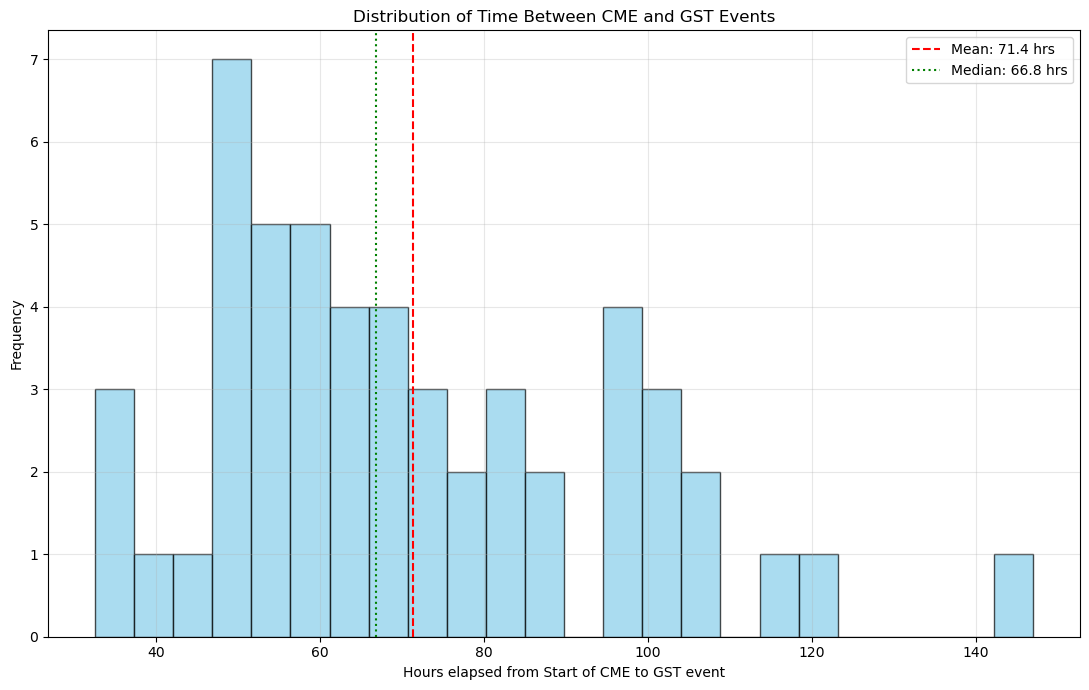

In [37]:
# Visualization -> Histogram of time differences:
def plot_time_diff_histogram(df, time_column='timeDiff'): 
    
    if df.empty:
        print("Error: DataFrame is empty - no data to visualize") 
        return
        
    if time_column not in merged_df.columns:
        print(f"Error: '{time_column}' column not found in DataFrame")
        print(f"Available columns: {list(merged_df.columns)}")
        return
        
    # Check if there are valid time differences to plot
    valid_times = merged_df[merged_df[time_column].notna()]
    if valid_times.empty:
        print(f"Error: No valid time differences found in the '{time_column}' column")
        return
    print(f"Found {len(valid_times)} valid time differences to plot")
    
    
# Convert to hours
hours = merged_df['timeDiff'].dt.total_seconds() / 3600
    
plt.figure(figsize=(11, 7))
plt.hist(hours, bins=24, alpha=0.7, color='skyblue', edgecolor='black')
    
# Add mean and median lines
mean_hours = hours.mean()
median_hours = hours.median()
plt.axvline(mean_hours, color='red', linestyle='--', 
    label=f'Mean: {mean_hours:.1f} hrs')
plt.axvline(median_hours, color='green', linestyle=':', 
    label=f'Median: {median_hours:.1f} hrs')
    
plt.title('Distribution of Time Between CME and GST Events')
plt.xlabel('Hours elapsed from Start of CME to GST event')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('CME_GST_Time_diff_histogram.png')
plt.show()
    

In [38]:
merged_df.head(2)

,cmeID,startTime_CME,GST_ActivityID,gstID,startTime,linkedEvents,CME_ActivityID,startTime_GST,timeDiff
0,2013-06-02T20:24:00-CME-001,2013-06-02 20:24:00+00:00,2013-06-07T03:00:00-GST-001,2013-06-07T03:00:00-GST-001,2013-06-07T03:00Z,[{'activityID': '2013-06-02T20:24:00-CME-001'}],2013-06-02T20:24:00-CME-001,2013-06-07 03:00:00+00:00,4 days 06:36:00
1,2013-09-29T22:40:00-CME-001,2013-09-29 22:40:00+00:00,2013-10-02T03:00:00-GST-001,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,[{'activityID': '2013-09-29T22:40:00-CME-001'}...,2013-09-29T22:40:00-CME-001,2013-10-02 03:00:00+00:00,2 days 04:20:00
